In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
import matplotlib.animation as ani
import mpl_toolkits.mplot3d as D3
import itertools
from IPython import display

## Equations of Linear Motion

The following equations define linear motion. The first 2 equations are used to derive the final equation. These equations assume a constant accelerating force on the body in motion.

\begin{align*}
v & = u+at \\
s & = ut+ \frac{1}{2}at^2 \\
v^2 & = u^2 +2as
\end{align*}

For a falling ball, there is acceleration due to gravity (9.80665 $ms^{-2}$).

In [3]:
def velocity(t,a,u):
    v = u+a*t
    return v

def distance(t,a,u,d):
    s = u*t+(a*t**2)/2+d
    return s

In [4]:
g = 9.80665
time = np.linspace(0,2,10000)

## Restitution

A defining factor in the motion of a bouncing ball is the restitution (or the bounciness) which ranges from 0 to 1. For a collision between 2 classical particle, the restitution is given by:

$$e = -\frac{v_2-v_1}{u_2-u_1}$$

For collisions between a wall and a body under constant acceleration, the final velocity perpendicular to the wall equal to the product of restitution and the velocity before collision.

$$e = -\frac{v_2}{v_1}$$

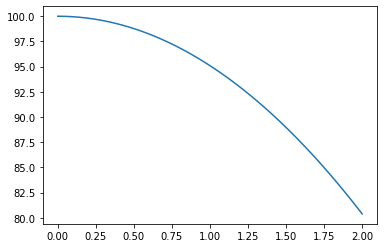

In [5]:
plt.plot(time,distance(time,-g,0,100));

In [25]:
def displacement(t,a,u,d,e):
    if d < 0 and u < 0:
        v = -e*u
        s = v*t+(a*t**2)/2+d
        f = v+a*t
    else:
        v = u
        s = v*t+(a*t**2)/2+d
        f = v+a*t
    return [s,f]

In [26]:
ypos = []
xpos = []
tpos = []
u = 0
v = 10
dy = 100
count = 0
for i in time:
    s = displacement(i,-g,u,dy,0.5)[0]
    u = displacement(i,-g,u,dy,0.5)[1]
    dx = v*i
    if dy < 10**(-4):
        count+=1
    dy = s
    xpos.append(dx)
    ypos.append(dy)
    tpos.append(i)
    if count > 30:
        break

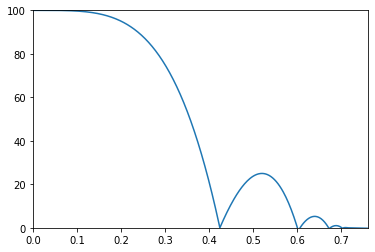

In [27]:
plt.plot(xpos,ypos)
plt.xlim(0,max(xpos))
plt.ylim(0,max(ypos));

(0, 10000.0)

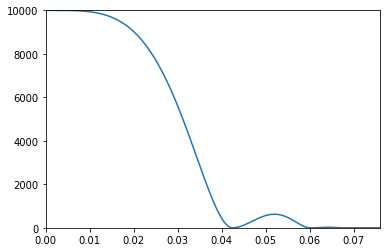

In [28]:
r = []
for i in range(np.size(xpos)):
    r.append(xpos[i]**2+ypos[i]**2)
plt.plot(tpos,r)
plt.xlim(min(tpos),max(tpos))
plt.ylim(0,max(r))

In [15]:
# initializing a figure
fig = plt.figure()

# labeling the x-axis and y-axis
axis = plt.axes(xlim=(0, 1000),  ylim=(0, 1000))
  
# lists storing x and y values
x, y = [], []
  
line, = axis.plot(0, 0)
  
def animate(frame_number):
    x.append(frame_number)
    y.append(frame_number)
    line.set_xdata(x)
    line.set_ydata(y)
    return line,

aniline = ani.FuncAnimation(fig, animate, frames=1000, 
                               interval=20, blit=True)
fig.suptitle('Straight Line plot', fontsize=14)

# converting to an html5 video
video = aniline.to_html5_video()
  
# embedding for the video
html = display.HTML(video)
  
# draw the animation
display.display(html)

# saving to mp4 using ffmpeg writer
# writervideo = ani.FFMpegWriter(fps=60)
writergif = ani.PillowWriter(fps=300)
# aniline.save('increasingStraightLine.mp4', writer=writervideo)
aniline.save('increasingStraightLine.gif', writer=writergif)
plt.close()

In [29]:
# initializing a figure
fig = plt.figure()
  
# labeling the x-axis and y-axis
axis = plt.axes(xlim=(0, max(xpos)),  ylim=(0, max(ypos)))
axis.set_ylabel('Height (m)')
axis.set_xlabel('Distance (m)')
line, = axis.plot([], [],'b--')
  
lines = []
for frame in range(np.size(tpos)):
    ball, = axis.plot(xpos[frame], ypos[frame],'ko')
    bounce, = axis.plot(xpos[:frame], ypos[:frame],'b--')
    lines.append([ball,bounce])

anibounce = ani.ArtistAnimation(fig, lines, 
                               interval=20, blit=True)
fig.suptitle('Bouncing Ball', fontsize=14)

# converting to an html5 video
video = anibounce.to_html5_video()
  
# embedding for the video
html = display.HTML(video)
  
# draw the animation
display.display(html)

# saving to mp4 using ffmpeg writer
#writervideo = ani.FFMpegWriter(fps=60)
#anibounce.save('Bouncing_Ball.mp4', writer=writervideo)
writergif = ani.PillowWriter(fps=60)
anibounce.save('Bouncing_Ball2.gif', writer=writergif)
plt.close()